## Codex Skill for explore the HPA

 * After each pandas instruction, a new varaible should be created to contain the output
 * The output should be printed in the end of each cell

In [3]:
import micropip
await micropip.install(["pandas", 'nbformat', 'pandas', 'plotly'])

In [4]:
# Startup script
from pyodide import http
import pandas as pd
import json
_response = await http.pyfetch("https://gist.githubusercontent.com/oeway/75e0db98bbd039149ab8efe1fafb95fd/raw/hpa-umap-data-2d.json")
_data = await _response.bytes()
_metadata = json.loads(_data)
hpa_metadata = []
metadata_keys = ['locations', 'cell_line', 'img', 'antibody', 'ensg']
for i in range(len(_metadata['x'])):
    info = {k:_metadata['customdata'][k][i] for k in metadata_keys}
    info['x'] = float(_metadata['x'][i])
    info['y'] = float(_metadata['y'][i])
    hpa_metadata.append(info)

pd_hpa = pd.DataFrame(hpa_metadata)

# Select the rows which contains CBX5 in the ensg column

In [5]:
pd_hpa[pd_hpa['ensg'].str.contains('CBX5')]

,locations,cell_line,img,antibody,ensg,x,y
37295,Nucleoplasm,U-251 MG,/17548/924_A3_1,CAB017548,ENSG00000094916:CBX5,-4.019904,-0.540121
37296,Nucleoplasm,U-251 MG,/17548/924_A3_2,CAB017548,ENSG00000094916:CBX5,-4.141887,-0.004049
37519,Nucleoplasm,U-2 OS,/17548/932_A3_1,CAB017548,ENSG00000094916:CBX5,-2.648635,-1.176650
37520,Nucleoplasm,U-2 OS,/17548/932_A3_2,CAB017548,ENSG00000094916:CBX5,-2.876200,-1.377819
38207,Nucleoplasm,A-431,/17548/971_A3_1,CAB017548,ENSG00000094916:CBX5,-3.527009,-0.379991
38208,Nucleoplasm,A-431,/17548/971_A3_2,CAB017548,ENSG00000094916:CBX5,-4.088074,0.602961
61739,Nucleoplasm,U-2 OS,/16699/132_F10_1,HPA016699,ENSG00000094916:CBX5,-0.181274,-3.430039
61740,Nucleoplasm,U-2 OS,/16699/132_F10_2,HPA016699,ENSG00000094916:CBX5,-0.366069,-2.023109
61898,Nucleoplasm,U-251 MG,/16699/164_F10_1,HPA016699,ENSG00000094916:CBX5,-2.744496,-2.084476
61899,Nucleoplasm,U-251 MG,/16699/164_F10_2,HPA016699,ENSG00000094916:CBX5,-0.961830,-3.668849


# Store the result into a variable

In [6]:
pd_hpa_cbx5 = pd_hpa[pd_hpa['ensg'].str.contains('CBX5')]

# Make a scatter plot

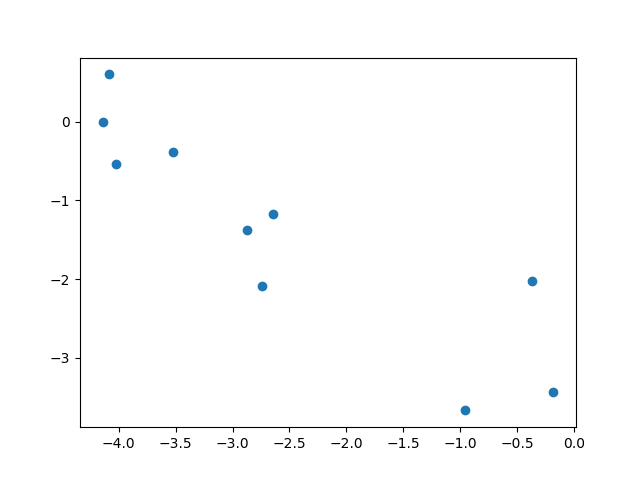

In [7]:
import matplotlib.pyplot as plt
plt.scatter(pd_hpa_cbx5['x'], pd_hpa_cbx5['y'])
plt.show()

# Make a scatter plot

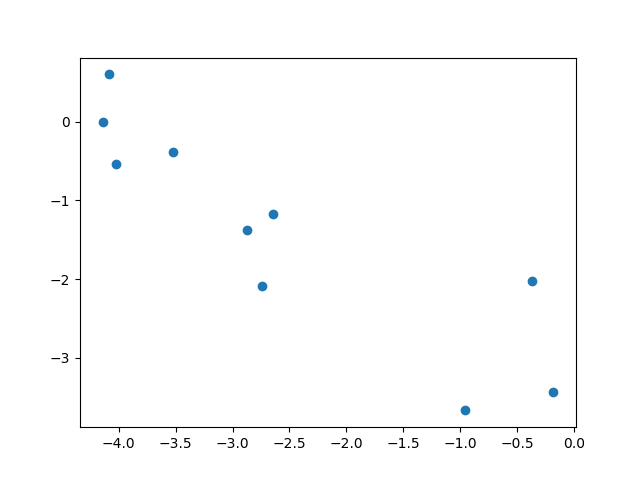

In [9]:
import matplotlib.pyplot as plt
plt.scatter(pd_hpa_cbx5['x'], pd_hpa_cbx5['y'])
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=pd_hpa['x'], y=pd_hpa['y']))
fig.update_layout(title = 'Hello Figure')
fig.show()